In [1]:
import pandas as pd


In [2]:
data = [
{"app": "A", "bid_price": 0.01, "win": 0, "events": 100000}, 
{"app": "A", "bid_price": 0.01, "win": 1, "events": 0}, 
{"app": "A", "bid_price": 0.1, "win": 0, "events": 7000}, 
{"app": "A", "bid_price": 0.1, "win": 1, "events": 3000}, 
{"app": "A", "bid_price": 0.2, "win": 0, "events": 8000000}, 
{"app": "A", "bid_price": 0.2, "win": 1, "events": 2000000}, 
{"app": "A", "bid_price": 0.4, "win": 0, "events": 700000}, 
{"app": "A", "bid_price": 0.4, "win": 1, "events": 300000}, 
{"app": "A", "bid_price": 0.5, "win": 0, "events": 80000}, 
{"app": "A", "bid_price": 0.5, "win": 1, "events": 20000}, 
{"app": "A", "bid_price": 0.75, "win": 0, "events": 7000}, 
{"app": "A", "bid_price": 0.75, "win": 1, "events": 3000}, 
{"app": "A", "bid_price": 1, "win": 0, "events": 400}, 
{"app": "A", "bid_price": 1, "win": 1, "events": 600}, 
{"app": "A", "bid_price": 2, "win": 0, "events": 30}, 
{"app": "A", "bid_price": 2, "win": 1, "events": 70}, 
{"app": "A", "bid_price": 5, "win": 0, "events": 2}, 
{"app": "A", "bid_price": 5, "win": 1, "events": 8}, 
{"app": "A", "bid_price": 9, "win": 0, "events": 0}, 
{"app": "A", "bid_price": 9, "win": 1, "events": 1}
]

df = pd.DataFrame(data)

In [3]:
df.head

<bound method NDFrame.head of    app  bid_price  win   events
0    A       0.01    0   100000
1    A       0.01    1        0
2    A       0.10    0     7000
3    A       0.10    1     3000
4    A       0.20    0  8000000
5    A       0.20    1  2000000
6    A       0.40    0   700000
7    A       0.40    1   300000
8    A       0.50    0    80000
9    A       0.50    1    20000
10   A       0.75    0     7000
11   A       0.75    1     3000
12   A       1.00    0      400
13   A       1.00    1      600
14   A       2.00    0       30
15   A       2.00    1       70
16   A       5.00    0        2
17   A       5.00    1        8
18   A       9.00    0        0
19   A       9.00    1        1>

### Basic Data Analysis

In [4]:
print(df.describe())
print("Unique bid price values  :", df['bid_price'].unique())

       bid_price        win        events
count  20.000000  20.000000  2.000000e+01
mean    1.896000   0.500000  5.610556e+05
std     2.829812   0.512989  1.810805e+06
min     0.010000   0.000000  0.000000e+00
25%     0.200000   0.000000  2.450000e+01
50%     0.625000   0.500000  3.000000e+03
75%     2.000000   1.000000  8.500000e+04
max     9.000000   1.000000  8.000000e+06
Unique bid price values  : [0.01 0.1  0.2  0.4  0.5  0.75 1.   2.   5.   9.  ]


- The 'bid_price' column has 10 different pricess which are more than 0.
- The maximum event is 8000000 which belongs to 0.2 in bid_price.
  

### Problem 1
Based on Table in above Scenario, estimate the expected win rate for a bid repsonse at a given price (prices are listed in table). State your assumptions clearly and provide the steps on how you arrived at your answer.

- Expected win rate for a bid response at given price can be calculated as :

$$
number of succesfull events / total number of events
$$

In [5]:
def calculateWinRate(df):

    winratedf = pd.DataFrame(df[df['win'] == 1].groupby(['app', 'bid_price'])['events'].sum() / 
                    df.groupby(['app', 'bid_price'])['events'].sum()).reset_index().rename(columns = {'events': 'win_rate'})

    return winratedf
    
# run the calculateWinRate function to calculate the win rate
dfWinRate = calculateWinRate(df)
dfWinRate
print(dfWinRate)

  app  bid_price  win_rate
0   A       0.01       0.0
1   A       0.10       0.3
2   A       0.20       0.2
3   A       0.40       0.3
4   A       0.50       0.2
5   A       0.75       0.3
6   A       1.00       0.6
7   A       2.00       0.7
8   A       5.00       0.8
9   A       9.00       1.0


Text(0, 0.5, 'win rate')

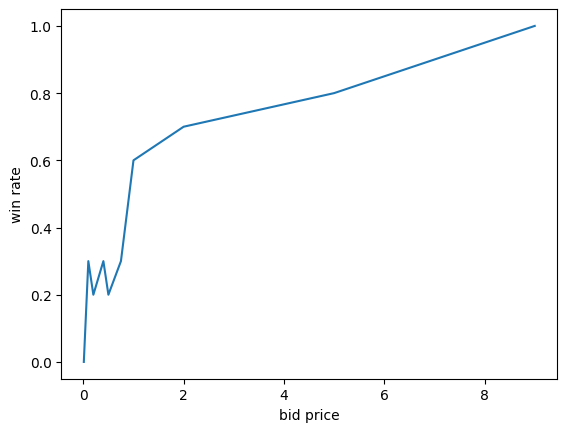

In [6]:
from matplotlib import pyplot as plt
plt.plot(dfWinRate["bid_price"], dfWinRate["win_rate"])
plt.xlabel("bid price")
plt.ylabel("win rate")


### Problem 2
We receive money from our advertisers if we deliver them a win. Lets say that our advertiser is willing to pay  0.50 per win.
This then becomes the upper bound for the bid valuation that we can submit in response to the publisher. For example, if we submit a bid response of 0.40 and we win, then the advertiser pays us 0.50, we pay 0.40 to the publisher and we made a net revenue of $0.10 .

If our goal was to maximize net revenue, what is the most optimal bid valuation we should send in our response? Use your estimations from Problem1 and all other available information.



- For each win event we will be earning (revenue per win - bid price), we will use estimated win rate calculated in problem 1 to get net revenue per event(either win or loose).
  
$$
Net Revenue = (revenue per win - bid price) * (succesfull win events) / (total events) * (total events)
$$

In [7]:
def calculateNetRevenue(df, revenue_per_bid = 0.50):

    unique_bid_price = df["bid_price"].unique()
    result = list()

    for bid_price in unique_bid_price:

        df_ = df[df['bid_price'] == bid_price]

        win_events = df_[df_['win'] == 1]['events'].sum()
        total_events = df_['events'].sum()
        
        net_revenue = ((revenue_per_bid - bid_price) * win_events/total_events ) * total_events

        result.append([bid_price, net_revenue, total_events])

    return result



# call calculateNetRevenue function to get net revenue for each bid price
result  = calculateNetRevenue(df)
result = pd.DataFrame(result, columns=['bid price', 'revenue', 'total events'])
result = result.sort_values(by='revenue', ascending=False)


In [8]:

result


,bid price,revenue,total events
2,0.20,600000.0,10000000
3,0.40,30000.0,1000000
1,0.10,1200.0,10000
0,0.01,0.0,100000
4,0.50,0.0,100000
9,9.00,-8.5,1
8,5.00,-36.0,10
7,2.00,-105.0,100
6,1.00,-300.0,1000
5,0.75,-750.0,10000
